In [1]:
import warnings
warnings.filterwarnings("ignore")

import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42) # Avoid type 3 fonts

sns.set_theme(style="white")
sns.set_palette(sns.color_palette("tab10"))
plt.rcParams.update({"xtick.bottom" : True}) # enables ticks

In [2]:
BASE_DIR = '../ios'
DATA_DIR = os.path.join(BASE_DIR, '../results/ios-2023-03-19')

FILES = [
    '2023-03-19-090754_sloth_iPhone12-1_16-3.json',
    '2023-03-19-090838_sloth_iPhone12-1_16-3.json',
    '2023-03-19-091258_sloth_iPhone13-2_15-6-1.json',
    '2023-03-19-091329_sloth_iPhone13-2_15-6-1.json',
    '2023-03-19-092151_sloth_iPhone14-5_16-0-2.json',
    '2023-03-19-092217_sloth_iPhone14-5_16-0-2.json',
]


def get_device_info(device_name):
    with open(os.path.join(BASE_DIR, 'server/models.json')) as f:
        return json.load(f)[device_name]


def read_data(path):
    with open(path) as f:
        d = json.load(f)
        
    info = get_device_info(d['device'])
    
    return pd.DataFrame(data={
        'Device': info['name'],
        'OS Version': d['version'],
        'Chip': info['chip'],
        'Configuration': f"{info['name']} ({d['version']})",
        'n': d['n'],
        'type': 'small' if d['n'] < 25 else 'large',
        'Measurement': [float(x) * 1000 for x in d['executionTimeSeconds']],
    })


def read_all_data():
    for f in FILES:
        path = os.path.join(DATA_DIR, f)
        x = read_data(path)
        yield x
        
df = pd.concat(read_all_data())
df.sample(10)

,Device,OS Version,Chip,Configuration,n,type,Measurement
96,iPhone 11,16.3,A13,iPhone 11 (16.3),6,small,99.097013
15,iPhone 11,16.3,A13,iPhone 11 (16.3),43,large,702.410936
79,iPhone 11,16.3,A13,iPhone 11 (16.3),43,large,702.732086
59,iPhone 11,16.3,A13,iPhone 11 (16.3),43,large,704.587936
20,iPhone 13,16.0.2,A15,iPhone 13 (16.0.2),95,large,765.557051
96,iPhone 13,16.0.2,A15,iPhone 13 (16.0.2),12,small,110.238910
46,iPhone 11,16.3,A13,iPhone 11 (16.3),43,large,717.504978
47,iPhone 13,16.0.2,A15,iPhone 13 (16.0.2),95,large,724.775910
43,iPhone 12,15.6.1,A14,iPhone 12 (15.6.1),10,small,102.723956
41,iPhone 12,15.6.1,A14,iPhone 12 (15.6.1),76,large,726.639986


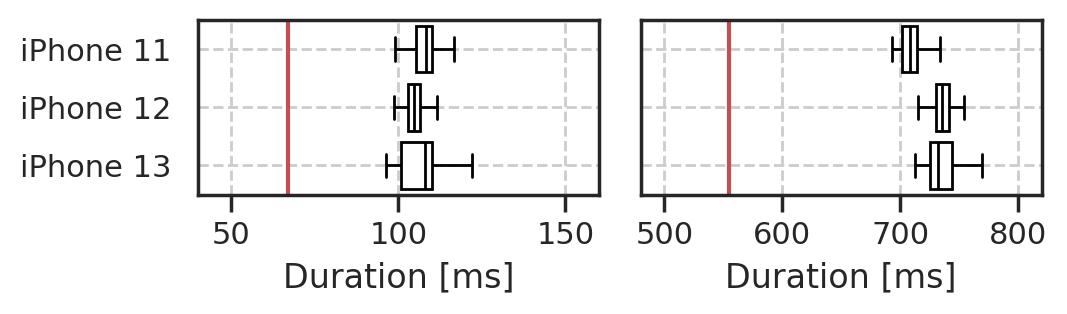

In [3]:
#
# Box plot with the iOS RainBow sloth execution times
#

fig, axs = plt.subplots(1,2)
fig.set_size_inches((5.5, 1.75))

ax1, ax2 = axs

sns.boxplot(
    data=df[df.type=='small'],
    y='Device',
    x='Measurement',
    color='white',
    ax=ax1,
    showfliers = False,
    boxprops = {'edgecolor': 'black'},
    medianprops = {'color': 'black'},
    whiskerprops = {'color': 'black'},
    capprops = {'color': 'black'},
)
ax1.axvline(x=67, color='r')
ax1.set_xlim((40, 160))
ax1.set_xlabel("Duration [ms]")
ax1.set_ylabel(None)
ax1.grid(ls='--')
# ax1.legend().remove()


sns.boxplot(
    data=df[df.type=='large'],
    y='Device',
    x='Measurement',
    color='white',
    ax=ax2,
    showfliers = False,
    boxprops = {'edgecolor': 'black'},
    medianprops = {'color': 'black'},
    whiskerprops = {'color': 'black'},
    capprops = {'color': 'black'},
)
ax2.axvline(x=555, color='r')
ax2.set_xlim((480, 820))
ax2.set_xlabel("Duration [ms]")
ax2.set_yticklabels([])
ax2.set_ylabel(None)
ax2.grid(ls='--')
# ax2.legend().remove()

fig.tight_layout()
fig.savefig("output/ios-rainbow-sloth-box-plot.pdf", dpi=300, bbox_inches='tight')